Please find instructions on how to run the code in [README](https://git.imp.fu-berlin.de/vbendikova/dsls-project/-/blob/main/README.md).

In [ ]:
!pip install gseapy
import gseapy

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
from gseapy.plot import gseaplot
from gseapy import gseaplot2
from gseapy import heatmap

In [ ]:
# Replace with your home path
home = "data/"

# **GSEA ASD**

In [ ]:
subset_asd = pd.read_csv(home + "asd_exp.csv", index_col=0)
subset_asd


control   control.1    control.2    control.3   control.4  \
A1BG       121.294977  135.205497   100.376936   104.288553  151.486141   
A1BG-AS1    35.058443   31.427095    31.122305    62.048137   43.769621   
A1CF        14.170615   13.871641    10.788985    14.481204   15.623799   
A2M         13.107961   18.179512    16.951847    15.879256   22.123421   
A2M-AS1     28.397500   28.749182    25.438558    19.900958   27.055838   
...               ...         ...          ...          ...         ...   
ZYG11A      19.248218   22.714569    14.560974    14.281435   17.825443   
ZYG11B     261.316399  339.951464   257.913533   245.226296  210.846395   
ZYX       1880.660401  855.833866  1024.420807  3469.397053  723.453619   
ZZEF1      173.615984  220.478682   180.578876   155.919510  178.998819   
ZZZ3       191.256558  208.318095   175.574475   109.105500  174.651987   

           control.5    control.6    control.7    control.8    control.9  ...  \
A1BG       96.506352    99.219584   159.543608    96.197600   185.391977  ...   
A1BG-AS1   24.387331    44.017369    48.029337    35.694725    50.041600  ...   
A1CF       12.292046    13.749919    11.839019    11.905869    15.710093  ...   
A2M        15.393655    13.946365    18.179913    14.624850    14.814041  ...   
A2M-AS1    94.894792    26.332507   104.624796    28.024350    49.007240  ...   
...              ...          ...          ...          ...          ...  ...   
ZYG11A     11.972330    14.997187    15.933022    11.059383    18.402196  ...   
ZYG11B    275.732049   247.648670   172.465404   300.380734   233.355085  ...   
ZYX       765.832142  1005.298440  1362.270489  1775.910948  2134.745737  ...   
ZZEF1     253.262187   213.381382   203.355537   210.238500   210.410000  ...   
ZZZ3      178.652494   214.713013   144.333405   180.043502   132.599834  ...   

           autism.72   autism.73    autism.74    autism.75   autism.76  \
A1BG      155.884643  147.619142   177.163427   117.838078  120.770392   
A1BG-AS1   43.971779   34.310304    44.111013    44.585479   40.534544   
A1CF       12.649725   12.069736    11.911529    12.376093   13.711741   
A2M        19.554220   18.272940    18.696411    18.727884   18.693256   
A2M-AS1    23.966362   17.026004    19.176799    16.220912   19.732830   
...              ...         ...          ...          ...         ...   
ZYG11A     14.131336   14.525662    18.477274    16.092382   16.162159   
ZYG11B    222.215807  238.333098   274.238315   188.516544  268.225963   
ZYX       619.258556  630.949601  1115.625284  2142.660353  791.466067   
ZZEF1     144.134590  169.909132   157.876435   207.557892  181.946927   
ZZZ3      192.728822  207.423269   177.445461   139.903976  178.117345   

           autism.77   autism.78   autism.79    autism.80    autism.81  
A1BG      142.635076  101.391999  149.880304   116.828707   136.247127  
A1BG-AS1   44.585479   44.791994   39.955217    52.729850    38.309944  
A1CF       13.199272   10.222826   12.122905    12.577490    12.504467  
A2M        19.948261   14.867098   14.070558    16.647584    19.535396  
A2M-AS1    15.124966  104.242155   21.084370    22.229969    27.270987  
...              ...         ...         ...          ...          ...  
ZYG11A     17.509112   13.978377   13.629342    13.416905    13.134770  
ZYG11B    307.303297  336.823443  268.111642   247.217167   240.737914  
ZYX       995.968296  796.180981  423.534009  1200.116224  1280.158784  
ZZEF1     207.687289  228.416034  184.763835   187.184649   184.267607  
ZZZ3      120.398693  189.283780  237.558675   166.075662   205.295790  

[23520 rows x 146 columns]

In [ ]:
class_vector_asd = []
for i in subset_asd.columns.values:
  if "control" in i:
    class_vector_asd.append("Control")
  else:
    class_vector_asd.append("Autism")


## **Use GO_Molecular_Function_2023 as the gene set library**




In [ ]:
gs_res_asd = gseapy.gsea(data=subset_asd,
                 gene_sets= "GO_Molecular_Function_2023",
                 cls= class_vector_asd,
                 permutation_type='phenotype',
                 permutation_num=1000,
                 outdir=None,
                 method='signal_to_noise',
                 threads=4, seed= 7)

In [ ]:
sign_asd = gs_res_asd.res2d[gs_res_asd.res2d["FDR q-val"] < 0.25]
sign_asd

Name                                               Term        ES  \
0  gsea  Voltage-Gated Monoatomic Ion Channel Activity ... -0.641066   
1  gsea                      Frizzled Binding (GO:0005109) -0.613087   

        NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0 -1.962979       0.0   0.06778      0.066  10/25  14.05%   
1 -1.905058       0.0  0.077218      0.132  19/31  24.60%   

                                          Lead_genes  
0  CALHM3;CACNA1H;GRIN2C;KCNJ8;GRIN2B;HCN1;VDAC3;...  
1  DVL1;WNT9A;SFRP1;CCDC88C;WNT2;WNT4;MYOC;WNT6;L...

In [ ]:
Lead_genes_asd = sign_asd.Lead_genes
Lead_genes_asd

0    CALHM3;CACNA1H;GRIN2C;KCNJ8;GRIN2B;HCN1;VDAC3;...
1    DVL1;WNT9A;SFRP1;CCDC88C;WNT2;WNT4;MYOC;WNT6;L...
Name: Lead_genes, dtype: object

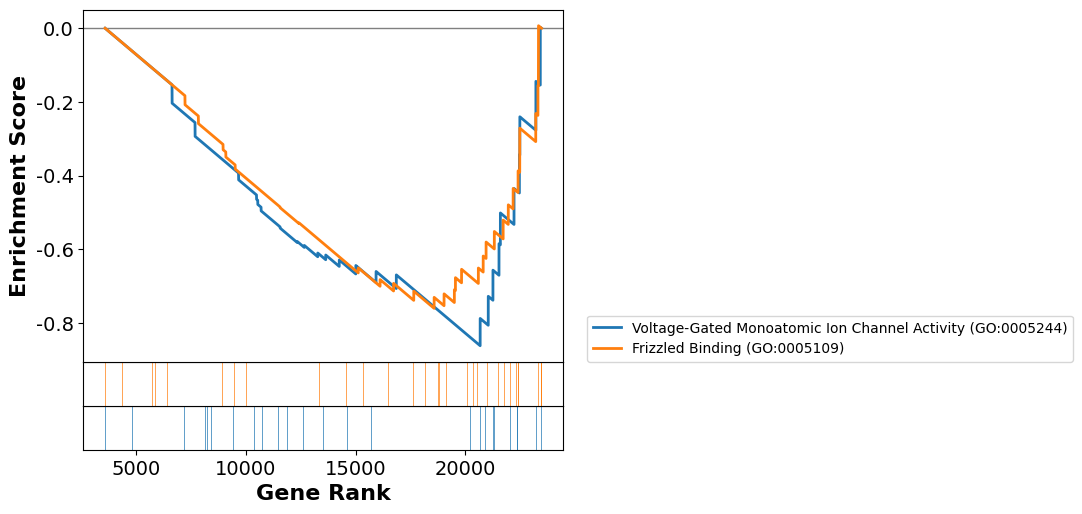

In [ ]:
terms = gs_res_asd.res2d.Term
axs = gs_res_asd.plot(terms[:2], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

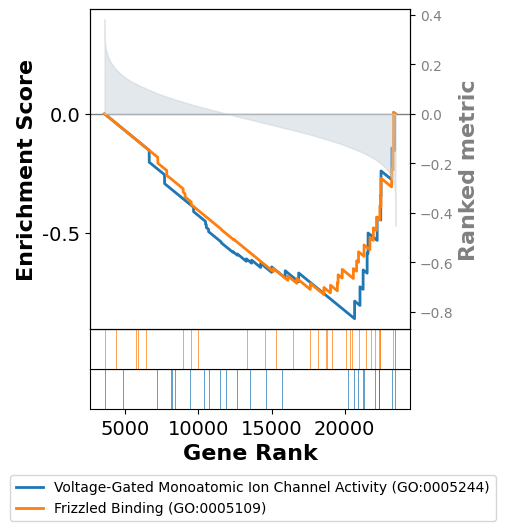

In [ ]:
terms = gs_res_asd.res2d[gs_res_asd.res2d["FDR q-val"] < 0.1].Term
hits = [gs_res_asd.results[t]['hits'] for t in terms]
runes = [gs_res_asd.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, RESs=runes, hits=hits,
              rank_metric=gs_res_asd.ranking,
              legend_kws={'loc': (-0.25, -0.6)}, # set the legend loc
              figsize=(4,5)) # rank_metric=pre_res.ranking

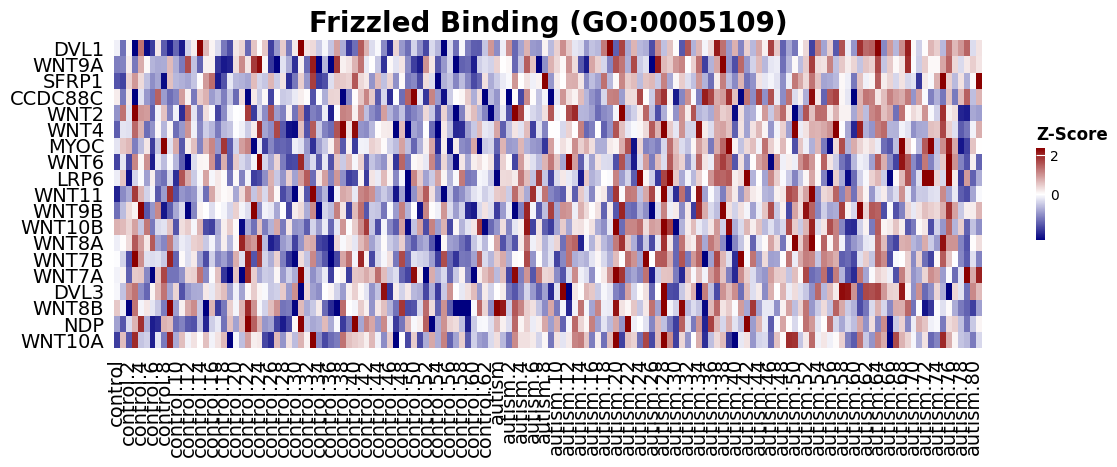

In [ ]:
genes = gs_res_asd.res2d.Lead_genes[1].split(";")
ax = heatmap(df = gs_res_asd.heatmat.loc[genes], z_score=0, title=gs_res_asd.res2d.Term[1], figsize=(14,4))

# **GSEA Schizophrenia**

In [ ]:
subset_scz = pd.read_csv(home + "scz_exp.csv", index_col=0)
subset_scz_dc = pd.read_csv(home + "scz_exp_dc.csv", index_col=0)

In [ ]:
class_vector_scz = []
for i in subset_scz.columns.values:
  if "control" in i:
    class_vector_scz.append("Control")
  else:
    class_vector_scz.append("Schizophrenia")


In [ ]:
class_vector_scz_dc = []
for i in subset_scz_dc.columns.values:
  if "control" in i:
    class_vector_scz_dc.append("Control")
  else:
    class_vector_scz_dc.append("Schizophrenia")

len(class_vector_scz_dc)

51

In [ ]:
subset_scz

In [ ]:
subset_scz_dc

## **Use GO_Molecular_Function_2023 as the gene set library**


In [ ]:
gs_res_scz = gseapy.gsea(data=subset_scz,
                 gene_sets= "GO_Molecular_Function_2023",
                 cls= class_vector_scz,
                 permutation_type='phenotype',
                 permutation_num=1000,
                 outdir=None,
                 method='signal_to_noise',
                 threads=4, seed= 7)

In [ ]:
gs_res_scz_dc = gseapy.gsea(data=subset_scz_dc,
                 gene_sets= "GO_Molecular_Function_2023",
                 cls= class_vector_scz_dc,
                 permutation_type='phenotype',
                 permutation_num=1000,
                 outdir=None,
                 method='signal_to_noise',
                 threads=4, seed= 7)

In [ ]:
# gs_res_scz_dc.res2d.head()
gs_res_scz_dc.res2d[gs_res_scz_dc.res2d["FDR q-val"] < 0.37]

Name                                               Term        ES  \
0   gsea  Core Promoter Sequence-Specific DNA Binding (G... -0.667469   
1   gsea        aminoacyl-tRNA Ligase Activity (GO:0004812) -0.750466   
9   gsea  NAD+ ADP-ribosyltransferase Activity (GO:0003950) -0.545979   
50  gsea  Protein-Lysine N-methyltransferase Activity (G... -0.442025   
51  gsea         5'-3' RNA Polymerase Activity (GO:0034062) -0.539014   
52  gsea  Histone H3 Methyltransferase Activity (GO:0140... -0.476684   
53  gsea  DNA-binding Transcription Repressor Activity, ... -0.320934   
70  gsea              Nuclear Receptor Binding (GO:0016922) -0.359166   
71  gsea            Methylated Histone Binding (GO:0035064) -0.433126   

         NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0  -1.962495       0.0  0.077299      0.054    17/31  16.09%   
1  -1.935978  0.002066   0.05276      0.071    11/18  12.10%   
9  -1.654213  0.010225  0.362937      0.771    14/26  25.49%   
50 -1.462872  0.062366  0.367736      0.985    25/40  40.35%   
51 -1.461474  0.071575  0.363129      0.986    13/17  35.17%   
52 -1.461103   0.08125  0.356108      0.986    13/34  20.21%   
53 -1.454254      0.03  0.364154      0.988  106/226  37.78%   
70 -1.406843  0.069959  0.369161      0.996   53/112  34.44%   
71 -1.406273  0.080247  0.364754      0.996    30/64  28.07%   

                                           Lead_genes  
0   TBPL1;HDAC1;SMARCA4;TAF1;BAZ2A;RELA;TBP;TAF1C;...  
1   PARS2;HARS2;AARS2;EARS2;YARS2;NARS2;LARS2;SARS...  
9   SIRT2;PARP16;SIRT1;PARP12;PARP15;PARP11;SIRT5;...  
50  SETD6;SETD4;KMT2B;SUV39H2;SMYD2;METTL21A;DOT1L...  
51  POLR2I;POLR1C;POLR1A;POLRMT;POLR3A;POLR2L;POLR...  
52  SETD4;KMT2B;SUV39H2;SMYD2;DOT1L;SUV39H1;PRMT2;...  
53  ZNF202;ZNF614;E4F1;ZBTB16;TBX21;ZBTB5;NFATC3;Z...  
70  MED9;TRIM68;ARID5A;MED12;SMARCA4;TAF1;BAZ2A;DD...  
71  THAP7;TAF1;CXXC1;KDM5A;PHF8;PHF1;DPF2;WDR5;CBX...

In [ ]:
gs_res_scz.res2d[gs_res_scz.res2d["FDR q-val"] < 0.15]
sign_scz = gs_res_scz.res2d[gs_res_scz.res2d["FDR q-val"] < 0.25]
sign_scz

Name                                               Term        ES  \
0   gsea        aminoacyl-tRNA Ligase Activity (GO:0004812) -0.777438   
1   gsea          N-acetyltransferase Activity (GO:0008080) -0.621618   
2   gsea  Core Promoter Sequence-Specific DNA Binding (G... -0.652276   
3   gsea  RNA Endonuclease Activity, Producing 5'-Phosph... -0.643511   
4   gsea                 Lipid Kinase Activity (GO:0001727)  -0.59982   
..   ...                                                ...       ...   
80  gsea           Histone Deacetylase Binding (GO:0042826) -0.382758   
81  gsea              Nuclear Receptor Binding (GO:0016922) -0.366876   
82  gsea  Protein Phosphatase Inhibitor Activity (GO:000... -0.449125   
84  gsea               Carboxylic Acid Binding (GO:0031406) -0.487284   
87  gsea  Ubiquitin-Protein Transferase Activity (GO:000... -0.325393   

         NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0  -2.056734       0.0  0.025488      0.019    11/18  13.79%   
1  -1.929602  0.005964  0.090481      0.115     8/20  13.27%   
2  -1.890964       0.0  0.095154       0.17    17/31  12.12%   
3  -1.845304  0.004008  0.132217      0.289    13/26  18.22%   
4  -1.799405  0.001992  0.181982      0.421     8/20  11.25%   
..       ...       ...       ...        ...      ...     ...   
80 -1.455534  0.041016  0.249922      0.989    36/87  24.99%   
81 -1.454147  0.044574  0.248894       0.99   64/112  39.38%   
82 -1.453129  0.072435  0.246794      0.991    15/23  31.52%   
84 -1.446515  0.067327  0.249745      0.992     6/16  24.36%   
87 -1.442015  0.027079  0.249977      0.992  167/358  36.51%   

                                           Lead_genes  
0   PARS2;HARS2;EARS2;YARS2;NARS2;LARS2;AARS2;FARS...  
1    NAT10;NAA10;NAGS;NAT1;ESCO1;GNPNAT1;NAT14;CREBBP  
2   TBP;HDAC1;SMARCA4;TAF1;GTF2B;TBPL1;SNAPC3;TAF1...  
3   RNASEH2A;RPP38;RPP14;DROSHA;POP4;POP7;FEN1;APE...  
4       DGKZ;PIK3CD;DGKQ;CERK;DGKK;DGKD;PIK3CG;PIK3CA  
..                                                ...  
80  MEF2D;MIER3;SIRT2;HDAC1;PKN1;RAD9A;THAP7;TRAF6...  
81  MED9;MED17;SMARCA4;PKN1;TRIM68;MED12;TAF1;GTF2...  
82  PPME1;PPP1R14B;CABIN1;PPP1R8;BOD1;PPP1R1A;PPP1...  
84               HIF1AN;DDAH2;AARS2;AKR1C1;RTN4R;ASS1  
87  RNF44;KLHL21;TRIM41;MUL1;VPS11;HECTD3;TRIM28;K...  

[72 rows x 10 columns]

In [ ]:
Lead_genes_scz = sign_scz.Lead_genes
Lead_genes_scz

0     PARS2;HARS2;EARS2;YARS2;NARS2;LARS2;AARS2;FARS...
1      NAT10;NAA10;NAGS;NAT1;ESCO1;GNPNAT1;NAT14;CREBBP
2     TBP;HDAC1;SMARCA4;TAF1;GTF2B;TBPL1;SNAPC3;TAF1...
3     RNASEH2A;RPP38;RPP14;DROSHA;POP4;POP7;FEN1;APE...
4         DGKZ;PIK3CD;DGKQ;CERK;DGKK;DGKD;PIK3CG;PIK3CA
                            ...                        
80    MEF2D;MIER3;SIRT2;HDAC1;PKN1;RAD9A;THAP7;TRAF6...
81    MED9;MED17;SMARCA4;PKN1;TRIM68;MED12;TAF1;GTF2...
82    PPME1;PPP1R14B;CABIN1;PPP1R8;BOD1;PPP1R1A;PPP1...
84                 HIF1AN;DDAH2;AARS2;AKR1C1;RTN4R;ASS1
87    RNF44;KLHL21;TRIM41;MUL1;VPS11;HECTD3;TRIM28;K...
Name: Lead_genes, Length: 72, dtype: object

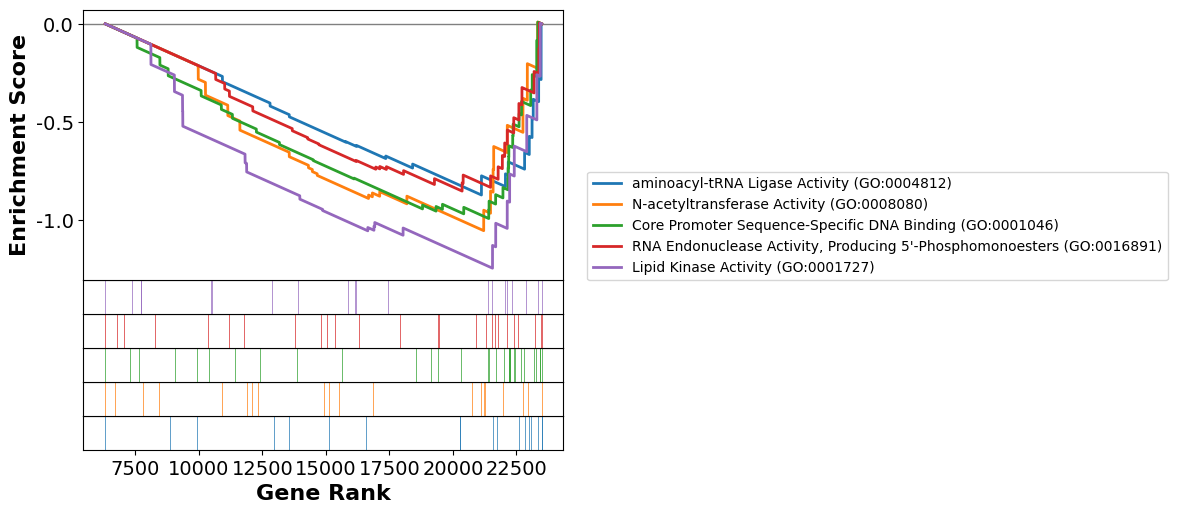

In [ ]:
terms = gs_res_scz.res2d.Term
axs = gs_res_scz.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

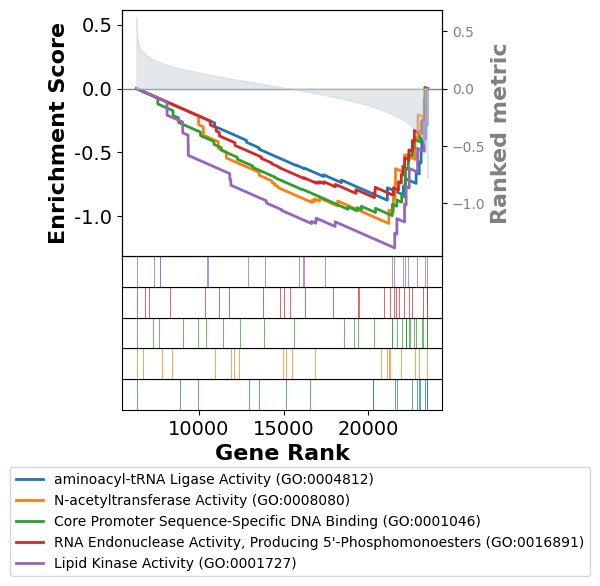

In [ ]:
terms = gs_res_scz.res2d.Term[:5]
hits = [gs_res_scz.results[t]['hits'] for t in terms]
runes = [gs_res_scz.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, RESs=runes, hits=hits,
              rank_metric=gs_res_scz.ranking,
              legend_kws={'loc': (-0.35, -1.3)}, # set the legend loc
              figsize=(4,5)) # rank_metric=pre_res.ranking

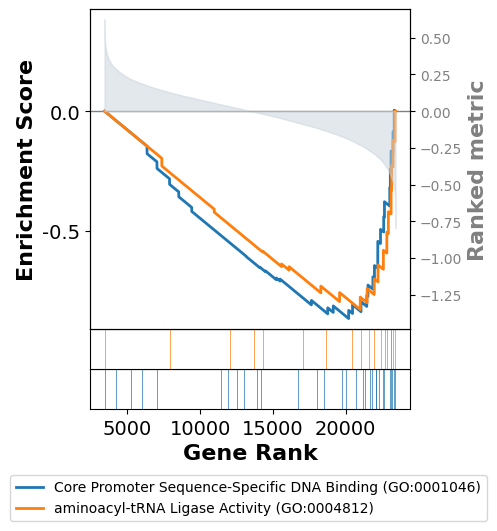

In [ ]:
terms = gs_res_scz_dc.res2d[gs_res_scz_dc.res2d["FDR q-val"] < 0.1].Term
hits = [gs_res_scz_dc.results[t]['hits'] for t in terms]
runes = [gs_res_scz_dc.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, RESs=runes, hits=hits,
              rank_metric=gs_res_scz_dc.ranking,
              legend_kws={'loc': (-0.25, -0.6)}, # set the legend loc
              figsize=(4,5)) # rank_metric=pre_res.ranking

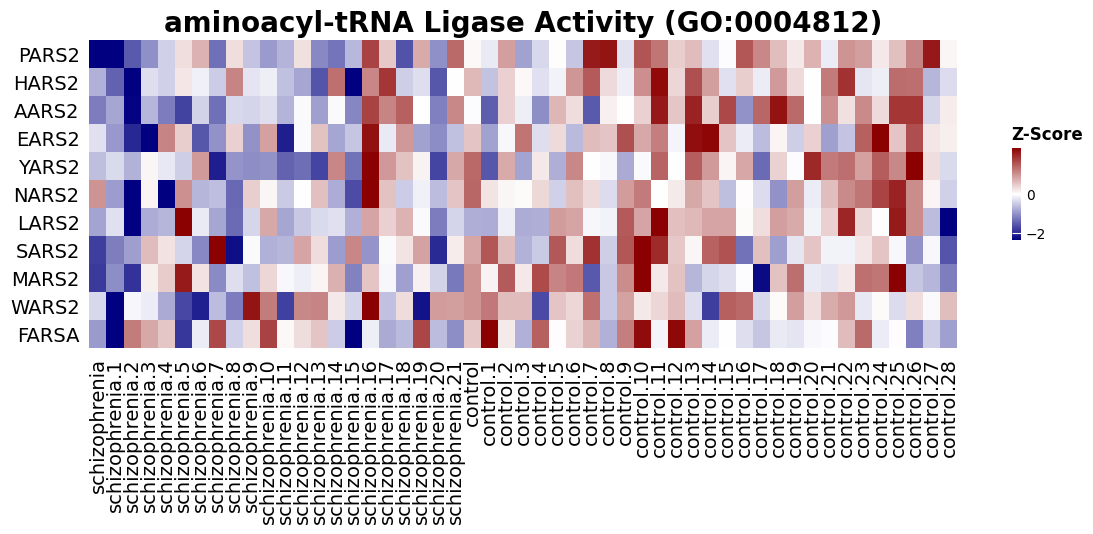

In [ ]:
genes = gs_res_scz_dc.res2d.Lead_genes[1].split(";")
ax = heatmap(df = gs_res_scz_dc.heatmat.loc[genes], z_score=0, title=gs_res_scz_dc.res2d.Term[1], figsize=(14,4))

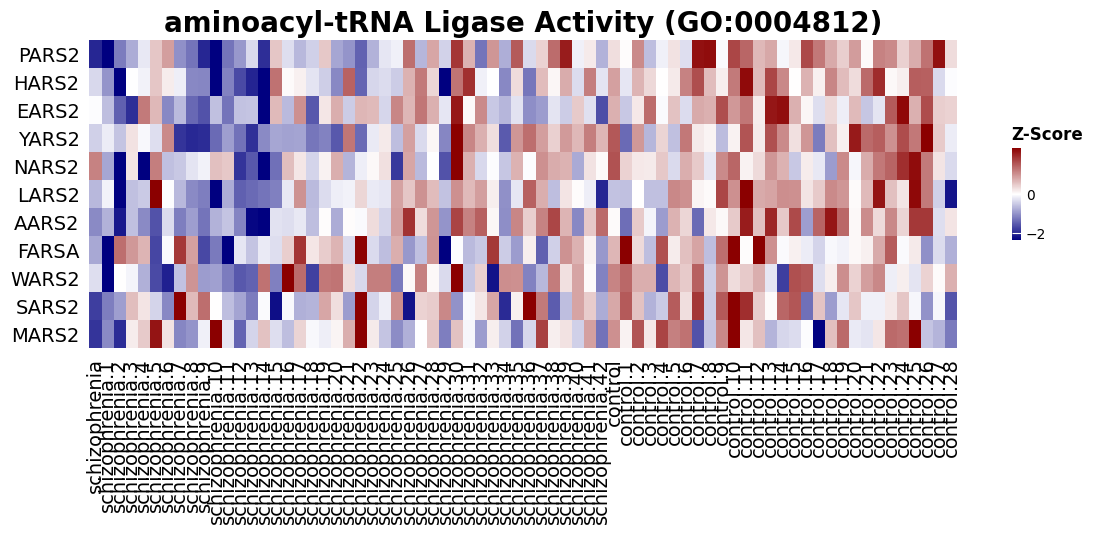

In [ ]:
genes = gs_res_scz.res2d.Lead_genes[0].split(";")
ax = heatmap(df = gs_res_scz.heatmat.loc[genes], z_score=0, title=gs_res_scz.res2d.Term[0], figsize=(14,4))

# **GSEA MDD**

In [ ]:
subset_mdd = pd.read_csv(home + "mdd_exp.csv", index_col=0)
subset_mdd

control  control.1  control.2  control.3  control.4  control.5  \
A1BG      3.678218   3.286122   2.978241   3.416928   3.915461   3.622674   
A1BG-AS1  6.443778   6.439185   6.091514   6.160160   6.262001   6.650213   
A1CF      3.282722   2.779510   2.701834   3.136804   2.722878   2.927107   
A2M       4.952460   4.575449   4.801654   4.814918   4.836391   4.607112   
A2M-AS1   8.313736   7.442635   8.522661   8.584944   8.582563   8.080346   
...            ...        ...        ...        ...        ...        ...   
ZYG11A    4.472377   4.687464   4.928949   4.379016   4.538363   4.160522   
ZYG11B    7.702434   8.273578   8.332399   8.055039   8.177309   8.418922   
ZYX       9.922776   9.761252   8.414962   9.092369   8.967648   9.341418   
ZZEF1     6.453670   6.335933   6.446376   6.527935   6.428279   6.555135   
ZZZ3      4.693944   5.581965   6.012590   5.716714   5.297856   5.759125   

          control.6  control.7  control.8  control.9  ...  control.57  \
A1BG       3.348873   3.407293   3.475643   3.588239  ...    3.592613   
A1BG-AS1   6.046788   6.930769   6.418877   6.679607  ...    6.629202   
A1CF       2.806098   2.691950   2.971447   2.958255  ...    2.722194   
A2M        4.566239   4.528694   4.940149   4.757857  ...    4.638567   
A2M-AS1    8.787317   8.089630   7.931064   7.702357  ...    7.713432   
...             ...        ...        ...        ...  ...         ...   
ZYG11A     4.396658   4.667440   4.280527   3.729029  ...    3.504938   
ZYG11B     8.559867   7.807338   8.284237   7.906655  ...    8.028612   
ZYX        8.551150   9.326148   9.529829   9.574537  ...   10.456391   
ZZEF1      6.586912   6.558270   6.884512   6.341421  ...    6.729450   
ZZZ3       6.041967   5.032671   5.168541   4.633298  ...    5.460113   

             mdd.61  control.58  control.59  control.60     mdd.62     mdd.63  \
A1BG       3.855741    3.845511    3.589142    3.502773   3.618603   3.791884   
A1BG-AS1   6.512555    6.482534    6.767941    6.677439   6.787397   7.079915   
A1CF       2.745230    2.643486    3.209170    2.591007   2.649972   3.033433   
A2M        4.339631    4.389326    4.522569    4.750834   4.872960   4.662414   
A2M-AS1    6.800672    7.133639    7.295100    8.266381   7.978626   7.685621   
...             ...         ...         ...         ...        ...        ...   
ZYG11A     3.428236    3.390104    3.393494    4.065496   3.713914   3.856949   
ZYG11B     8.477206    8.116576    8.004243    7.810824   7.764784   7.792606   
ZYX       10.268387   10.017479   10.863439    9.639776  10.356037  10.074941   
ZZEF1      6.661364    6.501560    6.853390    6.646841   6.619929   6.850845   
ZZZ3       5.936889    5.925068    5.344623    6.382690   5.864292   5.711944   

          control.61  control.62  control.63  
A1BG        3.453535    3.454187    3.765669  
A1BG-AS1    6.603517    6.562028    7.033624  
A1CF        2.871597    2.773500    3.082072  
A2M         4.716106    4.588417    4.876001  
A2M-AS1     7.938541    8.017463    8.066153  
...              ...         ...         ...  
ZYG11A      3.856006    3.736156    4.090386  
ZYG11B      7.508345    7.914982    7.472140  
ZYX         9.985552    9.808788   10.101097  
ZZEF1       6.910645    6.824424    6.589108  
ZZZ3        5.948168    6.270375    5.675278  

[23520 rows x 128 columns]

In [ ]:
class_vector_mdd = []
for i in subset_mdd.columns.values:
  if "control" in i:
    class_vector_mdd.append("Control")
  else:
    class_vector_mdd.append("Depression")

## **Use GO_Molecular_Function_2023 as the gene set library**

In [ ]:
gs_res_mdd = gseapy.gsea(data=subset_mdd,
                 gene_sets= "GO_Molecular_Function_2023",
                 cls= class_vector_mdd,
                 permutation_type='phenotype',
                 permutation_num=1000,
                 outdir=None,
                 method='signal_to_noise',
                 threads=4, seed= 7)

In [ ]:
# gs_res_mdd.res2d.head()
gs_res_mdd.res2d[gs_res_mdd.res2d["FDR q-val"] < 0.25]

Name                                               Term        ES  \
0   gsea                DNA Polymerase Binding (GO:0070182)  0.736595   
1   gsea   Carboxylic Ester Hydrolase Activity (GO:0052689) -0.500883   
2   gsea  Hydrolase Activity, Hydrolyzing O-glycosyl Com... -0.602814   
3   gsea                       Lipase Activity (GO:0016298) -0.523787   
4   gsea           Single-Stranded DNA Binding (GO:0003697)  0.583391   
5   gsea         Four-Way Junction DNA Binding (GO:0000400)  0.660247   
6   gsea  Potassium Ion Transmembrane Transporter Activi... -0.548234   
7   gsea  Intracellular Calcium Activated Chloride Chann... -0.608495   
8   gsea       DNA Secondary Structure Binding (GO:0000217)  0.547577   
9   gsea    Calcium Channel Regulator Activity (GO:0005246) -0.531486   
10  gsea  Phosphatidylinositol Phosphate Binding (GO:190... -0.428796   
11  gsea                      Protease Binding (GO:0002020) -0.385691   
12  gsea              Sterol Transfer Activity (GO:0120015) -0.582928   
13  gsea                  Amyloid-Beta Binding (GO:0001540) -0.430761   
14  gsea  Phosphatidylinositol Bisphosphate Binding (GO:... -0.426991   
15  gsea             DNA Endonuclease Activity (GO:0004520)  0.659186   
16  gsea  Amino Acid Transmembrane Transporter Activity ... -0.454597   
17  gsea  Intracellular Chloride Channel Activity (GO:00... -0.577757   
18  gsea    Insulin-Like Growth Factor Binding (GO:0005520) -0.570662   
19  gsea                        Myosin Binding (GO:0017022)  -0.42176   
20  gsea         Cholesterol Transfer Activity (GO:0120020)  -0.59844   
22  gsea  Phosphatidylinositol-3,4,5-Trisphosphate Bindi... -0.491431   
23  gsea                Phospholipase Activity (GO:0004620) -0.420368   
24  gsea     Monoatomic Anion Channel Activity (GO:0005253) -0.435991   
25  gsea      Solute:Proton Symporter Activity (GO:0015295) -0.498101   
26  gsea  Epidermal Growth Factor Receptor Binding (GO:0... -0.485659   
27  gsea             Phospholipase A2 Activity (GO:0004623) -0.513543   
28  gsea  Calmodulin-Dependent Protein Kinase Activity (... -0.521011   
29  gsea                 Leak Channel Activity (GO:0022840) -0.638508   
30  gsea  Cadherin Binding Involved In Cell-Cell Adhesio... -0.546379   
31  gsea                Growth Factor Activity (GO:0008083) -0.528753   
32  gsea           Semaphorin Receptor Binding (GO:0030215)  -0.54904   
34  gsea  Serine-Type Endopeptidase Inhibitor Activity (... -0.495466   
35  gsea      Endopeptidase Regulator Activity (GO:0061135) -0.449289   
36  gsea  Phosphatidylinositol-3,5-Bisphosphate Binding ... -0.487831   
37  gsea  Phosphatidylinositol-4,5-Bisphosphate Binding ... -0.414192   
39  gsea  Neutral L-amino Acid Transmembrane Transporter... -0.424367   
40  gsea  Chloride Transmembrane Transporter Activity (G... -0.427685   
41  gsea                   Calcium Ion Binding (GO:0005509) -0.363841   
42  gsea  Phosphatidylinositol-3-Phosphate Binding (GO:0... -0.476478   
43  gsea      Endopeptidase Inhibitor Activity (GO:0004866) -0.390816   
44  gsea               Chemorepellent Activity (GO:0045499) -0.516814   
45  gsea  Low-Density Lipoprotein Particle Binding (GO:0... -0.573526   
47  gsea  Protein Tyrosine Kinase Activator Activity (GO... -0.436891   
48  gsea  Cysteine-Type Endopeptidase Inhibitor Activity... -0.478616   
49  gsea    Serine-Type Endopeptidase Activity (GO:0004252)  -0.45377   

         NES NOM p-val FDR q-val FWER p-val    Tag %  Gene %  \
0   1.901088       0.0  0.095396       0.11     9/17  10.82%   
1  -1.896501       0.0  0.205227      0.128    58/90  32.58%   
2  -1.865403       0.0  0.141492      0.167    13/25  24.89%   
3  -1.852003  0.004016  0.111749      0.192    28/38  31.90%   
4   1.801294       0.0  0.159717      0.285    39/86  15.89%   
5   1.775283  0.007722  0.144781      0.358     7/16   9.12%   
6  -1.770144  0.006061  0.207458      0.404    18/31  32.50%   
7   -1.73774   0.00396  0.243978      0.517     9/17  22.69%

In [ ]:
gs_res_mdd.res2d.Lead_genes.tolist()[5]

'GEN1;RAD51D;MSH2;HMGB1;FANCM;WRN;RAD51B'

In [ ]:
sign_mdd = gs_res_mdd.res2d[gs_res_mdd.res2d["FDR q-val"] < 0.25]

In [ ]:
Lead_genes_mdd = sign_mdd.Lead_genes
Lead_genes_mdd

0     HSP90AA1;HSP90AB1;HMGB1;SMG6;PTGES3;NABP2;FANC...
1     NDST1;PNPLA2;APMAP;ACHE;ABHD16B;CES3;LCAT;PAFA...
2     CHIT1;GLA;HPSE;NEU1;IDUA;ACER1;CHIA;CTBS;GUSB;...
3     PNPLA2;PLBD1;ABHD16B;LCAT;PLBD2;ABHD2;DAGLA;AB...
4     WDR48;SMC5;HSPD1;NUCKS1;DHX9;RAD51D;FAM111A;MS...
5               GEN1;RAD51D;MSH2;HMGB1;FANCM;WRN;RAD51B
6     KCNK3;KCNK7;KCNC4;TMEM38A;KCNK16;SLC12A9;AQP1;...
7      TTYH3;ANO10;ANO7;BEST1;TTYH1;ANO4;ANO5;ANO2;ANO8
8     KMT2A;SMC5;GEN1;RAD51D;MSH2;RAD18;HMGB1;ERCC5;...
9     CACNG8;CACNG4;RRAD;CACNB3;CABP5;CABP4;YWHAE;PA...
10    KCNH1;SNX21;SH3PXD2B;HIP1;NLRP3;WIPI1;PHLDA3;D...
11    TIMP2;NLRC4;ELANE;NOL3;THBS1;COMP;INSL3;CD177;...
12    PLTP;CETP;OSBPL2;TSPO;APOA1;GRAMD1A;APOA2;APOB...
13    EPHB2;TLR2;MARCO;FZD5;TLR6;INSR;CLU;GRIA1;GRIN...
14    KCNH1;SNX21;GSN;SH3PXD2B;HIP1;WIPI1;PHLDA3;TPC...
15    DCLRE1C;RAD50;ERCC5;ERCC4;APEX1;RBBP8;N4BP2;FE...
16    SLC38A3;SLC47A1;SLC25A44;SLC7A4;SLC7A7;SLC36A1...
17     TTYH3;ANO10;ANO7;BEST1;TTYH1;ANO4;ANO5;AN

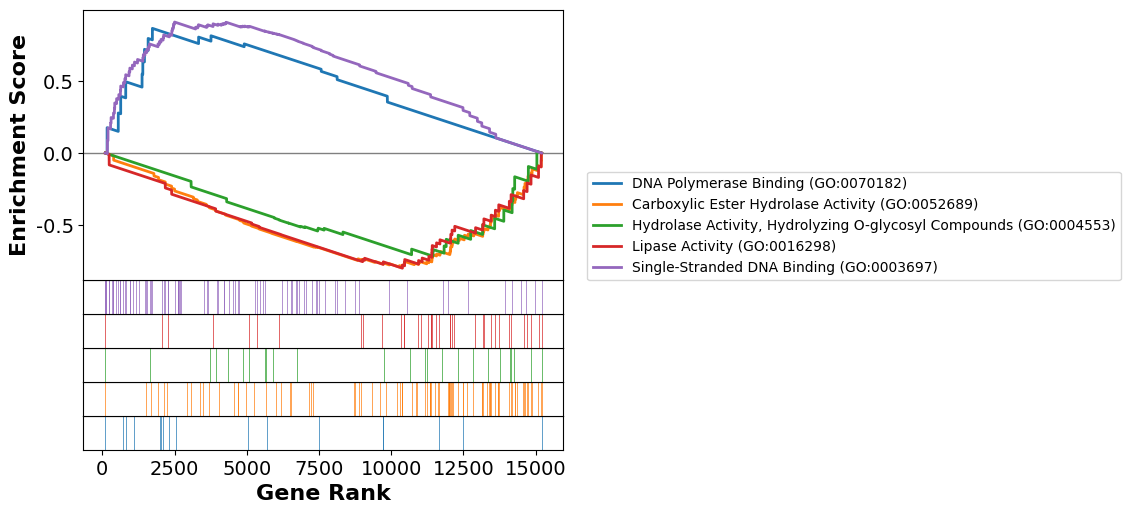

In [ ]:
terms = gs_res_mdd.res2d.Term
axs = gs_res_mdd.plot(terms[:5], show_ranking=False, legend_kws={'loc': (1.05, 0)}, )

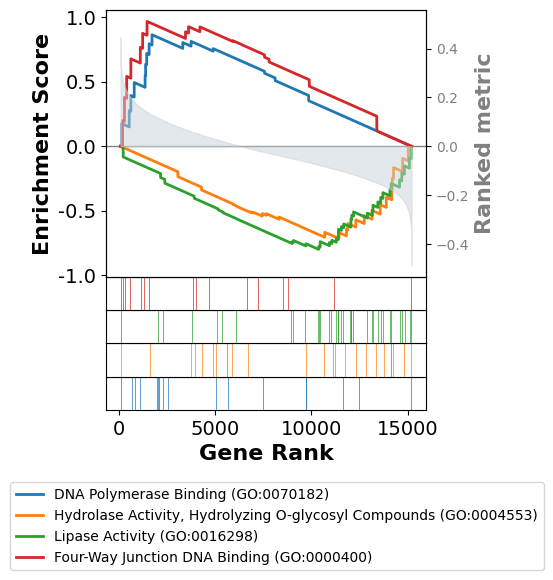

In [ ]:
terms = gs_res_mdd.res2d[gs_res_mdd.res2d["FDR q-val"] < 0.15].Term
hits = [gs_res_mdd.results[t]['hits'] for t in terms]
runes = [gs_res_mdd.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, RESs=runes, hits=hits,
              rank_metric=gs_res_mdd.ranking,
              legend_kws={'loc': (-0.3, -1.1)}, # set the legend loc
              figsize=(4,5)) # rank_metric=pre_res.ranking

# **Look for overlap**

In [ ]:
asd_scz_cross = gs_res_asd.res2d.merge(gs_res_scz.res2d, on='Term', how='inner')

asd_mdd_cross = gs_res_asd.res2d.merge(gs_res_mdd.res2d, on="Term", how="inner")

mdd_scz_cross = gs_res_mdd.res2d.merge(gs_res_scz.res2d, on="Term", how="inner")

In [ ]:
all_cross = asd_scz_cross.merge(gs_res_mdd.res2d, on='Term', how='inner')
all_cross

In [ ]:
asd_scz_cross_sign = sign_asd.merge(sign_scz, on='Term', how='inner')

asd_mdd_cross_sign = sign_asd.merge(sign_mdd, on="Term", how="inner")

mdd_scz_cross_sign = sign_mdd.merge(sign_scz, on="Term", how="inner")



In [ ]:
mdd_scz_cross_sign.Lead_genes_x.tolist()

['HSP90AA1;HSP90AB1;HMGB1;SMG6;PTGES3;NABP2;FANCI;PCNA;POLG2']

In [ ]:
mdd_scz_cross_sign.Lead_genes_y.tolist()

['LONP1;NAT10;SMARCA4;NABP2;HSP90AA1;POLG2;CDT1;PCNA;PTGES3;SMG6']

In [ ]:
Lead_genes_scz_list = []
for i in  Lead_genes_scz:
  Lead_genes_scz_list.extend(i.split(";"))

Lead_genes_asd_list = []
for i in  Lead_genes_asd:
  Lead_genes_asd_list.extend(i.split(";"))

Lead_genes_mdd_list = []
for i in Lead_genes_mdd:
  Lead_genes_mdd_list.extend(i.split(";"))

print(Lead_genes_mdd_list)
print(Lead_genes_scz_list)
print(Lead_genes_asd_list)

['HSP90AA1', 'HSP90AB1', 'HMGB1', 'SMG6', 'PTGES3', 'NABP2', 'FANCI', 'PCNA', 'POLG2', 'NDST1', 'PNPLA2', 'APMAP', 'ACHE', 'ABHD16B', 'CES3', 'LCAT', 'PAFAH1B3', 'NDST3', 'PLA2G7', 'GDE1', 'TNFAIP6', 'LYPLA2', 'PNPLA7', 'ABHD2', 'DAGLA', 'AOAH', 'ABHD16A', 'PLB1', 'LIPE', 'BCHE', 'FAAH', 'CES1P1', 'PLA2G2E', 'H6PD', 'ABHD1', 'PLA2G4F', 'PLA2G15', 'PLA2G2F', 'PGLS', 'NOTUM', 'CA2', 'ALDH2', 'ABHD5', 'ASPG', 'RGN', 'MGLL', 'PLA1A', 'CEL', 'PNPLA6', 'LGALS13', 'PRDX6', 'DAGLB', 'ABHD12', 'PLA2G2A', 'LCP1', 'NCEH1', 'PNPLA5', 'LIPG', 'ABHD4', 'PTRH2', 'LIPF', 'PON3', 'PNLIPRP1', 'PNLIPRP2', 'RPE65', 'ABHD3', 'PLA2G1B', 'CHIT1', 'GLA', 'HPSE', 'NEU1', 'IDUA', 'ACER1', 'CHIA', 'CTBS', 'GUSB', 'ACER3', 'GBA2', 'OVGP1', 'HYAL2', 'PNPLA2', 'PLBD1', 'ABHD16B', 'LCAT', 'PLBD2', 'ABHD2', 'DAGLA', 'ABHD16A', 'LIPE', 'FAAH', 'ABHD1', 'SMPD3', 'PITPNM3', 'ABHD5', 'MGLL', 'PLA1A', 'CEL', 'DAGLB', 'ABHD12', 'LCP1', 'NCEH1', 'PNPLA5', 'LIPG', 'LIPI', 'LIPF', 'PNLIPRP1', 'PNLIPRP2', 'ABHD3', 'WDR48', 'SM

In [ ]:
set_asd = set(Lead_genes_asd_list)
set_mdd = set(Lead_genes_mdd_list)
set_scz = set(Lead_genes_scz_list)
set_scz

In [ ]:
asd_mdd = set_asd.intersection(set_mdd)
asd_scz = set_asd.intersection(set_scz)
mdd_scz = set_mdd.intersection(set_scz)
asd_mdd_scz = asd_scz.intersection(set_mdd)

asd_mdd = list(asd_mdd)
asd_scz = list(asd_scz)
mdd_scz = list(mdd_scz)
asd_mdd_scz = list(asd_mdd_scz)
print(len(asd_mdd))
print(len(asd_scz))
print(len(mdd_scz))
print(len(asd_mdd_scz))


3
1
60
1


In [ ]:
asd_mdd_scz

['DVL3']

In [ ]:
asd_mdd

['GRIN1', 'DVL3', 'HCN1']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

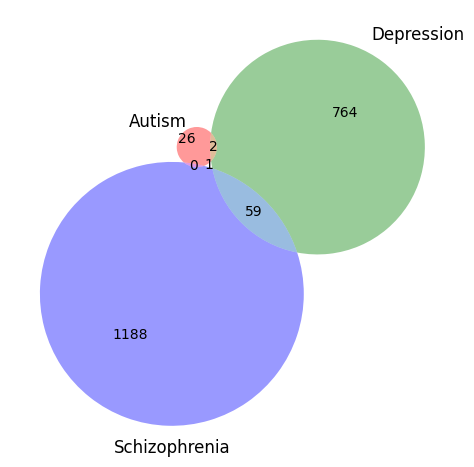

In [ ]:
venn_diagram = venn3(subsets=(len(set_asd) - len(asd_mdd) - len(asd_scz) + len(asd_mdd_scz),
                              len(set_mdd) - len(asd_mdd) - len(mdd_scz) + len(asd_mdd_scz),
                              len(asd_mdd) - len(asd_mdd_scz),
                              len(set_scz) - len(asd_scz) - len(mdd_scz) + len(asd_mdd_scz),
                              len(asd_scz) - len(asd_mdd_scz),
                              len(mdd_scz) - len(asd_mdd_scz),
                              len(asd_mdd_scz)),
                     set_labels=('Autism', 'Depression', 'Schizophrenia'))
plt.tight_layout()
plt.show()
